# KNN Predictive Model From Scratch

### This model was designed to predict students between 15 and 16 years of age science knowledge based on predictors.

## Unique Terms & Definitions in Python Programming:
### Class: (e.g., Class KNN:)
A class in Python is a way to create new types of objects, reuse code, and organize data and # actions efficiently (Luts, 2009).
       
### Object or Instance: (e.g., KNN(self, k = 3) in this Class of code is considered "object".)
A code that combines data like a variable with functionality or methods to manipulate the data (Luts, 2009)

### Attributes: 
(e.g., KNN(self, k = 3) in this class of code is considered "object" refer to data or methods associated with an object. They are essentially variables or functions tied to a class or instance that define its characteristics or behaviour

## Model Building
### (Citations and references are provided in the Code Interpretation Sections).

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from collections import Counter
import matplotlib.pyplot as plt

In [5]:
# Define the Euclidean distance function
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

# Define the KNN class
class KNN:
    def __init__(self, k=3): 
        self.k = k  # Number of neighbors

    def fit(self, X, y): 
        self.X_train = X  # Save training features
        self.y_train = y.reset_index(drop=True)  # Reset index of y
        print("Fit method called.")
        print(f"X_train shape: {self.X_train.shape}")
        print(f"y_train shape: {self.y_train.shape}")

    def predict(self, X): 
        predictions = [self._predict(x) for x in X]
        return predictions

    def _predict(self, x): 
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

## Code Interpretation Notes (1. KNN Model Building):
#### Define the Euclidean distance function
    def euclidean_distance(x1, x2): 
    return np.sqrt(np.sum((x1 - x2) ** 2))

Euclidean distance, widely regarded as the most intuitive metric, determines the straight-line distance between two data points in a multi-dimensional space. Its formula, derived from the Pythagorean theorem, is remarkably simple:(Miesle, 2024)

The equation was D = the square root of the sum of the squared differences between the corresponding data points across.


#### "class KNN: def _init_(self, k = 3): self.k = k"
This block of code initializes the KNN "class" setting the number of nearest data points that the model will reference for # estimating or predicting outcomes (the instructor set this value to 3 for now.). All parameters must be specified in the (_init_) function (Müller & Guido, 2016).

#### "def fit(self, X, y)":
        self.X_train = X  
        self.y_train = y.reset_index(drop=True)
        print("Fit method called.")
        print(f"X_train shape: {self.X_train.shape}")
        print(f"y_train shape: {self.y_train.shape}")

Video Instruction (AssemblyAI, 2022): This block of code is part of the fit method in the KNN class. It stores the training features (X_train) and the target values (y_train) as attributes of the class for later use during prediction. The reset_index(drop=True) ensures that the index of y_train is reset to a default sequential order (0, 1, 2, …) to avoid any mismatch with the positional indices of X_train. The method also prints the shapes of X_train and y_train to confirm that the data has been saved correctly and to provide a quick check on the dimensions of the input data.

#### def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return predictions

Video Instruction (AssemblyAI, 2022) The predict method takes a group of data points (X) and uses the _predict method to find the prediction for each point. It collects these predictions in a list and returns them, allowing the model to make predictions for multiple points at once.


#### The concept of "SELF" - Analogy by Microsoft Copilot (2024): Relationship of Class, Instance, and Self. 

    1. Coffee Shop (CoffeeShop class): This is the main place where everything happens.
    2. Manager and Barista (Manager and Barista classes): These are the people working in the coffee shop.

    Now, imagine each person in the coffee shop has their own notepad:

     - Manager's Notepad: This is where the manager writes important notes.
     - Barista's Notepad: This is where the baristas write down orders.

     When the coffee shop opens, everyone gets their own notepad:

     - Manager (Alice): Alice gets her own notepad.
     - Baristas (Bob and Charlie): Bob and Charlie each get their own notepads.
    
     When Alice writes a note, it goes in **her** notepad. When Bob or Charlie takes an order, 
     it goes in their notepads. Here, "self" is like each person's notepad:
    
     - `self` in `Manager` class: Refers to Alice's notepad.
     - `self` in `Barista` class: Refers to Bob's or Charlie's notepad.
    
     In programming terms, `self` ensures that each person (instance) keeps track of their own 
     stuff (attributes and methods), just like Alice, Bob, and Charlie each have their own notepads.

# 70/20/10 Split - KNN Model Prediction 
### (Citations are provided in the Code Interpretation Note).

Fit method called.
X_train shape: (216, 11)
y_train shape: (216,)
Test MSE: 0.8579279079475344
Validation MSE: 0.6557775400921094


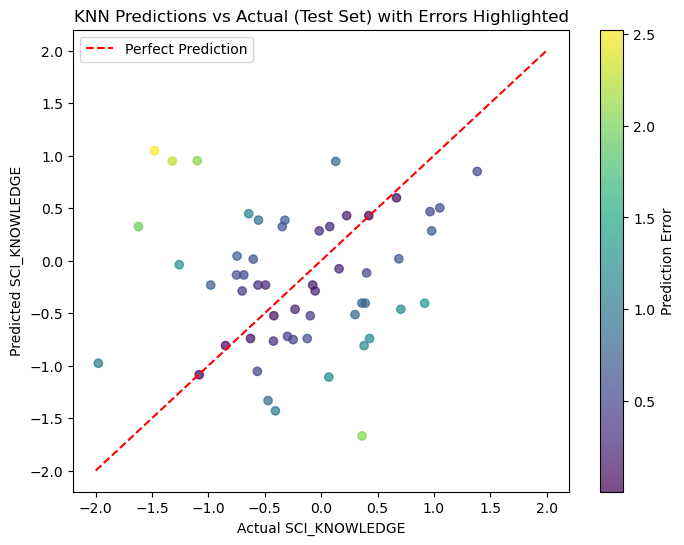

In [8]:
# Load the dataset
df = pd.read_csv("PISA2018_data.csv")

# Filter numeric columns only
numeric_df = df.select_dtypes(include=['number'])

# Split data into 70/20/10
X = numeric_df.drop('SCI_KNOWLEDGE', axis=1)  
y = numeric_df['SCI_KNOWLEDGE']            

# First split: 90% train-test, 10% validation
X_temp, X_val, y_temp, y_val = train_test_split(X, y, test_size=0.1, random_state=42) 

# Second split: 70% training, 20% testing (from the 90% data)
X_train, X_test, y_train, y_test = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)

# Make variables scaled so that different unit variables can be compared.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

# Initialize and train the KNN model
k = 3  # Number of neighbors
knn_model = KNN(k=k)
knn_model.fit(X_train_scaled, y_train)

# Test the model
y_test_pred = knn_model.predict(X_test_scaled)
test_mse = mean_squared_error(y_test, y_test_pred)
print(f"Test MSE: {test_mse}")

# Validate the model
y_val_pred = knn_model.predict(X_val_scaled)
val_mse = mean_squared_error(y_val, y_val_pred)
print(f"Validation MSE: {val_mse}")

# Calculate errors for colour differentiation 
errors = np.abs(y_test - y_test_pred)

# Create the scatter plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(y_test, y_test_pred, c = errors, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Prediction Error')  # Add color bar to indicate error scale
plt.plot([-2, 2], [-2, 2], 'r--', label='Perfect Prediction')  # Add perfect prediction line
plt.xlabel("Actual SCI_KNOWLEDGE")
plt.ylabel("Predicted SCI_KNOWLEDGE")
plt.title("KNN Predictions vs Actual (Test Set) with Errors Highlighted")
plt.legend()
plt.show()

## Code Interpretation Note (2. KNN Model Training & Prediction):
#### df.select_dtypes (Pandas, 2024)
    DataFrame.select_dtypes(include=None, exclude=None)

Return a subset of the DataFrame’s columns based on the column types.

#### Split data into 70/20/10 (scikit-learn, 2024a)
    X = numeric_df.drop('SCI_KNOWLEDGE', axis=1)  # Features
    y = numeric_df['SCI_KNOWLEDGE']              # Target variable

This block splits the dataset into features (X) and the target variable (y). The drop('SCI_KNOWLEDGE', axis=1) removes the column SCI_KNOWLEDGE from the DataFrame numeric_df, leaving all other columns as features in X. The column SCI_KNOWLEDGE is then assigned to y as the target variable that the model will predict.

#### # First split: 90% train-test, 10% validation (AssemblyAI, 2022a)
    X_temp, X_val, y_temp, y_val = train_test_split(X, y, test_size=0.1, random_state=42) 

This line splits the data into two subsets: 90% for training and testing (X_temp, y_temp) and 10% for validation (X_val, y_val). The train_test_split function ensures the split is random, with test_size=0.1 specifying that 10% of the data is allocated for validation. The random_state=42 sets a seed to ensure the split is reproducible.

#### # Make variables scaled so that different unit variables can be compared. (Scikit-learn, 2024a)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    X_val_scaled = scaler.transform(X_val)

This block standardizes the variable units to have a mean of 0 and a variance of 1, which is important for distance-based models like KNN. The StandardScaler() is initialized, and the fit_transform method is applied to X_train to compute the scaling parameters (mean and standard deviation) and transform the training data. The transform method is then applied to X_test and X_val to scale them using the same parameters from X_train, ensuring consistency across the datasets.

#### # Initialize and train the KNN model
    k = 3  # Number of neighbors
    knn_model = KNN(k=k)
    knn_model.fit(X_train_scaled, y_train)

This code block creates and trains a K-Nearest Neighbors (KNN) model. The variable k is set to 3, meaning the model will consider the 3 nearest neighbours when making predictions. 


#### Test the model (sklearn, 2024b) + Validate the model (sklearn, 2024b)
    y_test_pred = knn_model.predict(X_test_scaled)
    test_mse = mean_squared_error(y_test, y_test_pred)
    print(f"Test MSE: {test_mse}")
    
    y_val_pred = knn_model.predict(X_val_scaled)
    val_mse = mean_squared_error(y_val, y_val_pred)
    print(f"Validation MSE: {val_mse}")

These blocks test (with 20% of data) and validate (with 10% of data) the KNN model by predicting target values for the validation dataset (X_val_scaled) and calculating the Mean Squared Error (MSE) between the actual values (y_val) and the predicted values (y_val_pred). The MSE, a measure of prediction accuracy, is then printed, with lower values indicating better performance. This code references the "predict" function that I defined in the Model Building section. 


#### Showing the accuracy score(Stack overlow, 2015)
    # Calculate errors for colour differentiation
    errors = np.abs(y_test - y_test_pred)

Based on the visualization samples, I decided to add a colour differentiation per prediction based on the estimation accuracy compared to the read data points for the last 10% of the results. This value was stored as "errors" and was used in the plot as the 3rd dimention as the colour "c" in the plot. 

#### Create the scatter plot (Matplotlib, 2024)
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(y_test, y_test_pred, c = errors, cmap='viridis', alpha=0.7)
    plt.colorbar(scatter, label='Prediction Error')  
    plt.plot([-2, 2], [-2, 2], 'r--', label='Perfect Prediction')  
    plt.xlabel("Actual SCI_KNOWLEDGE")
    plt.ylabel("Predicted SCI_KNOWLEDGE")
    plt.title("KNN Predictions vs Actual (Test Set) with Errors Highlighted")
    plt.legend()
    plt.show()

Similarly to ggplot2 in R, there were helpful, quick reference PDFs on the Matplotlib website (they call them cheat sheets and handouts). You have to tinker around with the plot size and the overall look.  


### References:
AssemblyAI (Director). (2022, September 11). How to implement KNN from scratch with Python (Vol. 1) [Youtube]. https://www.youtube.com/watch?v=rTEtEy5o3X0

codiearcher. (2019, September 10). Sklearn.accuracy_score(y_test, y_predict) vs np.mean(y_predict == y_test) [Forum post]. Data Science Stack Exchange. https://datascience.stackexchange.com/q/58961

Lutz, M. (20). Learning Python: Powerful object-oriented programming ; covers Python 2.6 and 3.x (4. ed., [Nachdr.]). O’Reilly.

Microsoft Copilot, L. L. M. (2024, December 13). Analogy of Self in Python Programming—Using a Coffee Shop. Microsoft Copilot: Your AI Companion. https://copilot.microsoft.com/chats/md7pQ6w54MFWQX3GBmmWY

Müller, A., & Guido, S. (2016). Introduction to Machine Learning with Python: A Guide for Data Scientists (1st edition). O’Reilly Media.

Numpy. (2024). NumPy user guide—NumPy v2.1 Manual [NumPy user guide]. Numpy. https://numpy.org/doc/stable/user/index.html#user

NumPy. (2024). numpy.argsort—NumPy v2.1 Manual. https://numpy.org/doc/stable/reference/generated/numpy.argsort.html#numpy-argsort

Pandas. (2024). pandas.DataFrame.select_dtypes—Pandas 2.2.3 documentation. API Reference > DataFramepandas > pandasDataFrame (Pandas.DataFrame.Select_dtypes). https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.select_dtypes.html

Python. (2024a). collections—Container datatypes. Python Documentation. https://docs.python.org/3/library/collections.html

Python, R. (2024b, Juy). Split Your Dataset With scikit-learn’s train_test_split() – Real Python. https://realpython.com/train-test-split-python-data/

scikit-learn. (2024a). StandardScaler. Scikit-Learn. https://scikit-learn/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

scikit-learn. (2024b). Train_test_split. Train_test_split. https://scikit-
learn/stable/modules/generated/sklearn.model_selection.train_test_split.html
sklearn. (2024). Mean_squared_error. Mean_squared_error. https://scikit-learn/stable/modules/generated/sklearn.metrics.mean_squared_error.html
_error.html

